Prepare data so it is ready to be used in the following form:

Propertycrime=α+Population+Population2+Murder+Robbery

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
# read in data
file_path = 'table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xlsx'
df = pd.read_excel(file_path, header=4, skipfooter=3)

In [3]:
df.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
343,Woodbury Town,10685,3,0,NaN,0,2,1,541,9,529,3,NaN
344,Woodridge Village,829,7,0,NaN,0,0,7,17,8,9,0,0.0
345,Woodstock Town,5931,2,0,NaN,0,0,2,58,13,45,0,NaN
346,Yonkers,199134,1036,6,NaN,25,390,615,2368,470,1662,236,10.0
347,Yorktown Town,36643,15,0,NaN,0,2,13,334,45,287,2,NaN


In [4]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,3.480000e+02,348.000000,348.000000,0.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,187.000000
mean,4.003763e+04,201.594828,1.566092,NaN,5.864943,72.902299,121.261494,792.606322,119.683908,637.017241,35.905172,1.871658
std,4.500374e+05,2815.268504,18.303673,NaN,60.425452,1031.032873,1706.131730,7659.724746,924.948789,6346.054451,403.423826,10.693411
min,5.260000e+02,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.003000e+03,2.000000,0.000000,NaN,0.000000,0.000000,1.000000,40.500000,6.000000,31.000000,0.000000,0.000000
50%,7.233500e+03,6.000000,0.000000,NaN,0.000000,1.000000,4.000000,112.500000,17.500000,94.000000,2.000000,0.000000
75%,1.842750e+04,22.000000,0.000000,NaN,2.000000,5.000000,14.000000,341.000000,51.250000,287.250000,7.000000,1.000000
max,8.396126e+06,52384.000000,335.000000,NaN,1112.000000,19170.000000,31767.000000,141971.000000,16606.000000,117931.000000,7434.000000,132.000000


Index(['city', 'population', 'violent crime',
       'murder and nonnegligent manslaughter', 'rape (revised definition)1',
       'rape (legacy definition)2', 'robbery', 'aggravated assault',
       'property crime', 'burglary', 'larceny- theft', 'motor vehicle theft',
       'arson3', 'robbery raw'],
      dtype='object')


[]

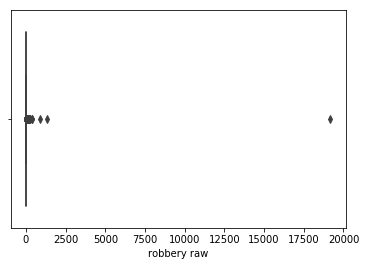

In [5]:
df.columns = df.columns.str.replace('\n',' ').str.lower()
df['robbery raw'] = df['robbery']
print(df.columns)

ax = sns.boxplot(x='robbery raw', data=df)
plt.plot()

#ax = sns.distplot(df['robbery raw']);
#plt.plot()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 14 columns):
city                                    348 non-null object
population                              348 non-null int64
violent crime                           348 non-null int64
murder and nonnegligent manslaughter    348 non-null int64
rape (revised definition)1              0 non-null float64
rape (legacy definition)2               348 non-null int64
robbery                                 348 non-null int64
aggravated assault                      348 non-null int64
property crime                          348 non-null int64
burglary                                348 non-null int64
larceny- theft                          348 non-null int64
motor vehicle theft                     348 non-null int64
arson3                                  187 non-null float64
robbery raw                             348 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 38.1+ KB


In [7]:
df[df['robbery raw'] > 10000]

,city,population,violent crime,murder and nonnegligent manslaughter,rape (revised definition)1,rape (legacy definition)2,robbery,aggravated assault,property crime,burglary,larceny- theft,motor vehicle theft,arson3,robbery raw
216,New York,8396126,52384,335,NaN,1112,19170,31767,141971,16606,117931,7434,NaN,19170


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


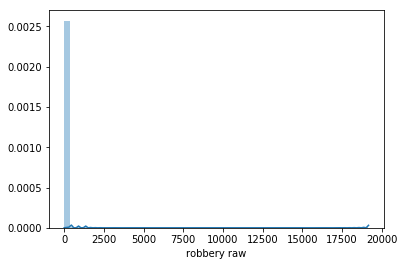

In [13]:
ax = sns.distplot(df['robbery raw'])

In [9]:
df['violent crime perc'] = df['violent crime'] / df['population']
df[df['violent crime'] > 100]


,city,population,violent crime,murder and nonnegligent manslaughter,rape (revised definition)1,rape (legacy definition)2,robbery,aggravated assault,property crime,burglary,larceny- theft,motor vehicle theft,arson3,robbery raw,violent crime perc
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN,227,0.008075
7,Amherst Town,118296,107,1,NaN,7,31,68,2118,204,1882,32,3.0,31,0.000905
22,Binghamton,46304,284,3,NaN,19,101,161,2349,525,1767,57,NaN,101,0.006133
35,Buffalo,258789,3249,47,NaN,145,1322,1735,12491,3458,8076,957,NaN,1322,0.012555
53,Cheektowaga Town,78361,158,0,NaN,11,48,99,2689,345,2271,73,2.0,48,0.002016
108,Freeport Village,43214,152,0,NaN,2,76,74,933,168,698,67,8.0,76,0.003517
126,Greece Town,96667,151,0,NaN,9,60,82,2303,332,1925,46,NaN,60,0.001562
140,Hempstead Village,55198,433,10,NaN,3,204,216,958,206,630,122,2.0,204,0.007844
154,Jamestown,30658,168,0,NaN,19,39,110,1140,281,829,30,NaN,39,0.005480
195,Middletown,27809,114,1,NaN,6,47,60,852,136,683,33,4.0,47,0.004099


In [10]:
df['population_squared'] = df['population'] * df['population']
df['murder'] = np.where(df['murder and nonnegligent manslaughter'] > 0, 1, 0)
df['robbery'] = np.where(df['robbery'] > 0, 1, 0)

In [11]:
#df.drop(columns=['city','violent crime',
#       'murder and nonnegligent manslaughter', 'rape (revised definition)1',
#       'rape (legacy definition)2', 'aggravated assault',
#       'property crime', 'burglary', 'larceny- theft', 'motor vehicle theft',
#       'arson3'], inplace=True)

In [12]:
cols = ['population', 'population_squared', 'robbery', 'murder']
df_model = df[cols]
df_model.head()

,population,population_squared,robbery,murder
0,1861,3463321,0,0
1,2577,6640929,0,0
2,2846,8099716,0,0
3,97956,9595377936,1,1
4,6388,40806544,1,0
